# 1. Indroduction
This tutorial will mainly talk about one of the simplest and classic classification algorithm used in Machine Learning, which is K-Nearest Neighbors. KNN is a non-parametric, lazy learning algorithm, where the function is only approximated locally and all computation is deferred until classification. Non-parametric means KNN doesn't make any assumptions on the data distribution of the observed data. In machine learning, lazy learning is a learning method in which generalization of the training data is delayed until a query is made to the system, as opposed to in eager learning, where the system tries to generalize the training data before receiving queries. What's more, we will also cover one of the method we use to pick the value 'K' in the KNN, which is cross validation.

# 2. What is KNN
KNN is a very simple algorithm, the concept of KNN is to find the k-most similar instances of a given instance in order to predict the classification of this instance. The entire training dataset will be the model of KNN. Though it's very simple, KNN is a very competitive algorithms because it does not make any assumptions on anything about the data except the distance metric. As such, we call it non-parametic or non-linear since it does not assume a functional form.

# 3. Learn KNN By classifying Flowers with Python

## 3.1 dataset
We will use iris classifcation to be the example of this tutotial.

The dataset we use in this tutorial will be iris data from https://archive.ics.uci.edu/ml/datasets/Iris. The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other. What we will predict is the class of iris plant.

Each Data point will have 5 attributes:
1. sepal length in cm 
2. sepal width in cm 
3. petal length in cm 
4. petal width in cm 
5. class: 
-- Iris Setosa 
-- Iris Versicolour 
-- Iris Virginica

![title](dataset.png)

## 3.2 Read Data

Firstly, we need to read the data from the text file in csv format. The job can be finished wiht the csv module of python.

In [207]:
import csv
data_file = open('iris.txt')
# read the data from csv file
csv_data = csv.reader(data_file)

After loading the data, we then need to convert the data type, from strings to float numbers. Next we should split the data into training set and test set ramdomly. In this tutorial, we will let 1/3 of the total data to be in the training set.

In [120]:
import random
training_set = []
test_set = []
for line in csv_data:
    if len(line) ==  0:
        continue
    for x in range(len(line) - 1):
        line[x] = float(line[x])
    if random.random() < 0.4:                #split the data into training set and test set with 0.4/0.6 ratio
        training_set.append(line)
    else:
        test_set.append(line)


After running the above code, we will have two sets: **training_set** and **test_set**. 
## 3.3 Define the similarity
Next step is to determine the metric for computing the similarity. We need to do this because we have to find the k most similar instances in the model in order to make the prediction. In this example problem, all the features are numeric so that we can use Euclidean distance measure. The definition of Euclidean distance is as following:
$$Euclidean\_distance(a,b) = \sqrt{\sum_{i=1}^n(a_i - b_i)^2}$$


In [121]:
import math
def distance(a,b):
    distance = 0
    for x in range(len(a) - 1):
        distance += pow(a[x] - b[x], 2)               #compute the distance
    return math.sqrt(distance)

## 3.4 Complete KNN
Now that we have a similarity measure, we can use this metric to find the k most similar instances for a given unseen instance. We first compute all distances between the unseen instance and all the instances in the training set and then choose k nearest instance as the unseen instance's neighbor.

We use below code to find the K nearest neighbor.

In [122]:
def find_neighbors(training_set, unseen_instance, k):
    distance_list = []
    for instance in training_set:
        distance_list.append((distance(instance, unseen_instance), instance[-1]))
                      #compute the distance of all neighbors
    distance_list.sort(key = lambda x: x[0])              #sort the distance 
    neighbors = [x[1] for x in distance_list[:k]]              #fidn the nearest neighbors
    return neighbors

After we get the most similar neighbors for a given unseen instance, we can make our predictions now. We can simply do it using majority vote.

Below is the code making the prediction based on the k neighbors. We use **defaultdict** class from python's built in **collections**. It overrides one method and adds one writable instance variable. The remaining functionality is the same as for the dict class and is not documented here.

The first argument provides the initial value for the *default_factory* attribute; it defaults to None. All remaining arguments are treated the same as if they were passed to the dict constructor, including keyword arguments.

In [123]:
from collections import defaultdict
def predict(neighbors):
    vote = defaultdict(int)
    for neighbor in neighbors:
        vote[neighbor] += 1
    vote_l = list(vote.items())              #predict by majority vote
    vote_l.sort(key = lambda x: x[1], reverse = True)
    return vote_l[0][0]

Now we have all the functions we need to implement a KNN classifier. we will use **training_set** as the model and test on the **test_set**.

In [192]:
def validate(training_set, test_set, k):
    errors = []
    for data_point in test_set:
        neighbors = find_neighbors(training_set, data_point, k)
        prediction = predict(neighbors)
        if prediction != data_point[-1]:
            errors.append((prediction, data_point[-1]))
    error_rate = len(errors) / len(test_set)              #compute the accuracy rate
    accuracy = 1 - error_rate
    return accuracy, errors

accuracy, errors = validate(training_set, test_set, 4)
print('accuracy rate is ' + str(accuracy))
print('erros is ' + str(errors))

accuracy rate is 0.9651162790697675
erros is [('Iris-virginica', 'Iris-versicolor'), ('Iris-versicolor', 'Iris-virginica'), ('Iris-versicolor', 'Iris-virginica')]


## 3.5 Doing KNN with scikit-learn
Actually we can implemnt KNN by a much simpler way, which is using scikit-learn. We can use **KNeighborsClassifier** from **sklearn** to implement the algorithms. What we have to do is to fit the model using X as training data  and y as targt values

In [196]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors = 4)
sk_train_feature = []
sk_train_label = []              #construct feeding data to the model
for data in training_set:
    sk_train_feature.append(data[:-1])
    sk_train_label.append(data[-1])
neigh.fit(X, Y)              #fit the model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')

In [208]:
sk_test_feature = []
sk_test_label = []
for data in test_set:
    sk_test_feature.append(data[:-1])
    sk_test_label.append(data[-1])
    
sk_predictions  = []
for data in sk_test_feature:
    sk_predictions.append(neigh.predict([data])[0])              #make preditions with trained model
result = zip(sk_predictions, sk_test_label)
error_number = 0
for x in result:
    if x[0] != x[1]:
        error_number += 1              #recording the wrong predictions
        print(x)
error_rate = error_number / len(test_set)
accuracy = 1 - error_rate
print('accuracy rate is '+ str(accuracy))


('Iris-versicolor', 'Iris-virginica')
('Iris-versicolor', 'Iris-virginica')
('Iris-versicolor', 'Iris-virginica')
accuracy rate is 0.9651162790697675


# 4 Parameter selection
The best choice of k depends upon the data; generally, larger values of k reduces effect of the noise on the classification, but make boundaries between classes less distinct. A good k can be selected by various heuristic techniques. 

The accuracy of the k-NN algorithm can be severely degraded by the presence of noisy or irrelevant features, or if the feature scales are not consistent with their importance. Much research effort has been put into selecting or scaling features to improve classification.

As we can see, the optimal K is the one that can let us have the lowest error rate. We can estimate the test error rate by holding out a subset of the training data from the fitting process. The held subset of data will be called calidation set. In practise, there are lots of approaches to be used to make validation. In this tutorial, what we will use is K-fold cross validation.

Someone may ask that why do we use subset of **training set** as the validation set instead of using **test set**. The reason for this is that using test set to fit the model will cause over-fitting. Using **test set** as the training data will force our model to fit the test data and make our model has worse generalization ability. Our model Will not have the ability to make good predictions when meeting unseen data.


# 5 What is K-fold Cross Validation
![title](img2.png)

As we can see in the picture, in K-fold croos validation, we partition the original training dataset in to k equal sized sets. Of the k sub sets, one set is reserved to be the validation set and we use the remaining sets as our training set. Then we repeat this process for k times, with holding every sub set as our validaton set. At last, we can use average of k results produced by k repetition as our estimation.

In [137]:
def cross_validation(fold_num, training_set, test_k):
    k_training_set = [training_set[x::fold_num] for x in range(fold_num)]    #split the data into k samples
    accuracy_list = []
    for hold in range(fold_num):
        sub_train_set  = []
        for x in range(fold_num):
            if x != hold:
                sub_train_set += k_training_set[x]
        validation_set = k_training_set[hold]
        accuracy, errors = validate(sub_train_set, validation_set,test_k)     #validate on the validation set
        accuracy_list.append(accuracy)
    average = sum(accuracy_list) / len(accuracy_list)
    return average

In below code, we test the accuracy rate of selecting k from 1 to 19 by cross validation.

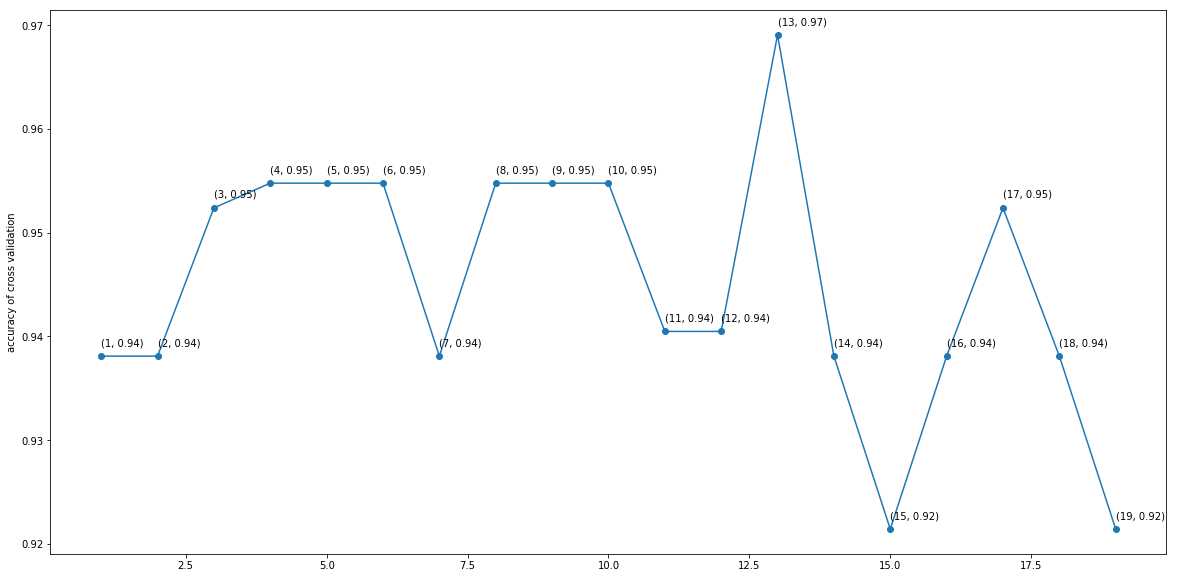

In [190]:
accuracy_list = []
for k in range(1,20):
    accuracy_list.append(cross_validation(10, training_set, k))
    
import matplotlib.pyplot as plt
# print(accuracy_list)
x_index = range(1, 20)
plt.figure(figsize=(20,10))
plt.plot(x_index, accuracy_list,'-o')              #plot the accuracy on validation set
plt.ylabel('accuracy of cross validation')
for a,b in zip(x_index, accuracy_list): 
    plt.text(a, b+0.001, "(%d, %0.2f)" %(a,b))
plt.show()

In below code, we test the accuracy rate of selecting k from 1 to 19 on test rate.

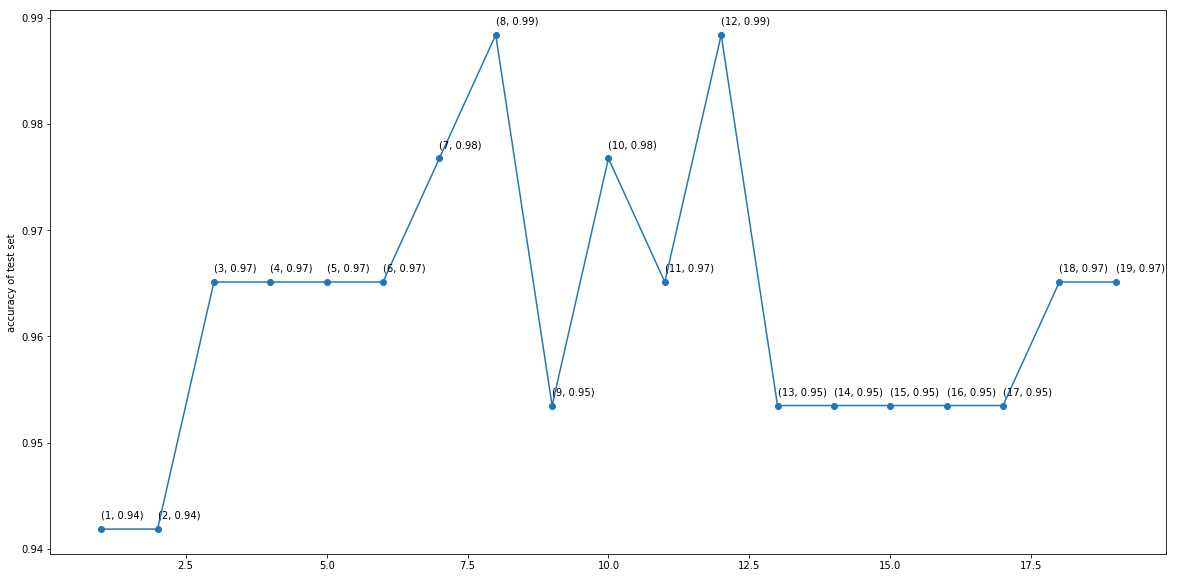

In [193]:
accuracy_list = []
for k in range(1,20):
    accuracy_list.append(validate(training_set,test_set, k)[0])
    
# print(accuracy_list)
x_index = range(1, 20)
# print(x_index, accuracy_list)
plt.figure(figsize=(20,10))
plt.plot(x_index, accuracy_list,'-o')
plt.ylabel('accuracy of test set')
for a,b in zip(x_index, accuracy_list): 
    plt.text(a, b+0.001, "(%d, %0.2f)" %(a,b))
plt.show()

# 6 Reference
https://archive.ics.uci.edu/ml/datasets/Iris

https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm

https://en.wikipedia.org/wiki/Lazy_learning

https://kevinzakka.github.io/2016/07/13/k-nearest-neighbor/

https://docs.python.org/2/library/collections.html